## Análisis de Variables

In [6]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('dataset.csv')
data = pd.DataFrame(df)

In [7]:
# Sample data
print('Datos de la encuesta: \n')

#Función 1 = len
#Utilizado para el conteo del total de personas encuestadas
totalPeople = len(data)

# Print the total number of people that answered the survey
print('Número total de personas que contestaron la encuesta: ', totalPeople, '\n')

# Column names
admission_age = 'Edad de ingreso a la universidad'
gender = 'Género'

# Get the number of people that answered by gender
femaleAge = data[gender] == 'Mujer'
maleAge = data[gender] == 'Hombre'

# Print min, max and mean age of women

#Función 2 = min
#Utilizada para la busqueda de la edad minima al momento de ingresar a la carrera
minAgeFemale = data[femaleAge][admission_age].min()

#Función 3 = min
#Utilizada para la busqueda de la edad máxima al momento de ingresar a la carrera
maxAgeFemale = data[femaleAge][admission_age].max()

#Función 4 = mean
#Utilizada para la busqueda de la edad media al momento de ingresar a la carrera
meanAgeFemale = data[femaleAge][admission_age].mean()

print('Edad mínima de las mujeres que contestaron la encuesta: ', minAgeFemale)
print('Edad máxima de las mujeres que contestaron la encuesta: ', maxAgeFemale)
print('Edad promedio de las mujeres que contestaron la encuesta: ', meanAgeFemale)

print('')

# Print min, max and mean age of men

#Función 2 = min
#Utilizada para la busqueda de la edad minima al momento de ingresar a la carrera
minAgeMale = data[maleAge][admission_age].min()

#Función 3 = min
#Utilizada para la busqueda de la edad máxima al momento de ingresar a la carrera
maxAgeMale = data[maleAge][admission_age].max()

#Función 4 = mean
#Utilizada para la busqueda de la edad media al momento de ingresar a la carrera
meanAgeMale = data[maleAge][admission_age].mean()


print('Edad mínima de los hombres que contestaron la encuesta: ', minAgeMale)
print('Edad máxima de los hombres que contestaron la encuesta: ', maxAgeMale)
print('Edad promedio de los hombres que contestaron la encuesta: ', meanAgeMale)

Datos de la encuesta: 

Número total de personas que contestaron la encuesta:  82 

Edad mínima de las mujeres que contestaron la encuesta:  17
Edad máxima de las mujeres que contestaron la encuesta:  23
Edad promedio de las mujeres que contestaron la encuesta:  18.1

Edad mínima de los hombres que contestaron la encuesta:  17
Edad máxima de los hombres que contestaron la encuesta:  23
Edad promedio de los hombres que contestaron la encuesta:  18.305084745762713


## Gráficos de barra

### Número de personas motivadas y no motivadas por sus profesores de secundaria para elegir la carrera, por región

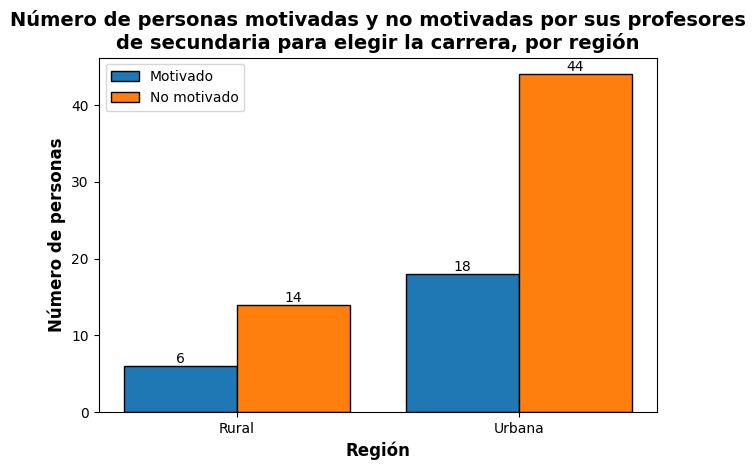

In [ ]:
# Define the columns that will be used to get the number of people that answered the survey by region of origin and motivation by teachers
region_col = 'Indique la región de la cual viene'
motivated_col = '¿Tuvo motivación por los profesores de secundaria para escoger la carrera?'

# Get the number of people that answered the survey by region of origin
rural_motivated = data[(data[region_col] == 'Rural') & (data[motivated_col] == 'Si')]
rural_non_motivated = data[(data[region_col] == 'Rural') & (data[motivated_col] == 'No')]
urban_motivated = data[(data[region_col] == 'Urbana') & (data[motivated_col] == 'Si')]
urban_non_motivated = data[(data[region_col] == 'Urbana') & (data[motivated_col] == 'No')]

# Get the number of people that answered the survey by region of origin and motivation by teachers
motivated_counts = [len(rural_motivated), len(urban_motivated)]
non_motivated_counts = [len(rural_non_motivated), len(urban_non_motivated)]

# Define the labels for the regions
region_labels = ['Rural', 'Urbana']

# Función 5 = arange
#Utilizada para ordenar el índice de las regiones rurales y urbanas para poder mostrarlos en el gráfico de barras
regionIndexes = np.arange(len(region_labels))

# Función 6 = plt.bar
# Utilizada para crear el gráfico de barras
first_bar = plt.bar(regionIndexes - 0.2, motivated_counts, 0.4, label='Motivado', edgecolor='black')
second_bar = plt.bar(regionIndexes + 0.2, non_motivated_counts, 0.4, label='No motivado', edgecolor='black')

plt.bar_label(first_bar)
plt.bar_label(second_bar)

plt.xticks(regionIndexes, region_labels)
plt.xlabel("Región", fontsize=12, fontweight='bold')
plt.ylabel("Número de personas", fontsize=12, fontweight='bold')
plt.title("Número de personas motivadas y no motivadas por sus profesores\nde secundaria para elegir la carrera, por región", fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
#plt.savefig('results/motivated_by_region.png', bbox_inches='tight')
plt.show()


### Número de personas por género y emoción experimentada al ingresar a la carrera

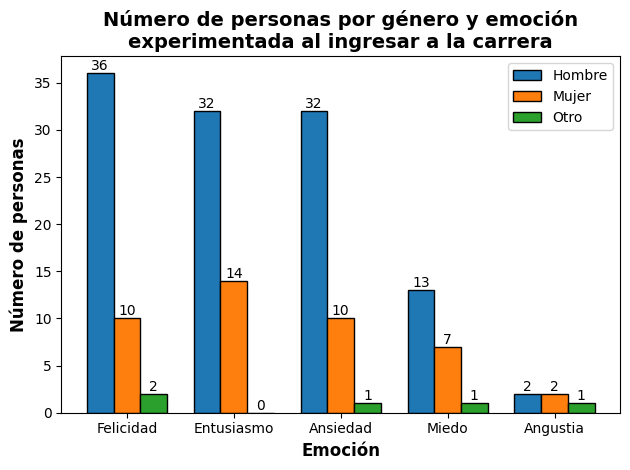

In [ ]:
# Define the columns that will be used to get the number of people that answered the survey by emotional response to being accepted by gender
emotional_response_col = '¿Cuál fue su emoción al ingresar a la carrera?'
gender_col = 'Género'

# Get all the possible values for the emotional response column, each column can have multiple values
# emotional_responses = data[emotional_response_col].str.split(',').explode().dropna()

# Primary emotions that will be used to group the emotional responses by gender
happiness = 'Felicidad'
enthusiasm = 'Entusiasmo'
anxiety = 'Ansiedad'
fear = 'Miedo'
distress = 'Angustia'

# Get the number of males that answered the survey by emotional response to being accepted

# Función 7 = str.contains
#Utilizada para poder extraer los datos del género especificado que presente la emoción planteada

#Función 8 = .shape
#Genera un conteo de la cantidad de filas que cumplen con la emoción y género planteado
happy_males = data[(data[gender_col] == 'Hombre') & (data[emotional_response_col].str.contains(happiness, na=False))].shape[0]
enthusiastic_males = data[(data[gender_col] == 'Hombre') & (data[emotional_response_col].str.contains(enthusiasm, na=False))].shape[0]
anxious_males = data[(data[gender_col] == 'Hombre') & (data[emotional_response_col].str.contains(enthusiasm, na=False))].shape[0]
fearful_males = data[(data[gender_col] == 'Hombre') & (data[emotional_response_col].str.contains(fear, na=False))].shape[0]
distressed_males = data[(data[gender_col] == 'Hombre') & (data[emotional_response_col].str.contains(distress, na=False))].shape[0]

# Get the number of females that answered the survey by emotional response to being accepted
happy_females = data[(data[gender_col] == 'Mujer') & (data[emotional_response_col].str.contains(happiness, na=False))].shape[0]
enthusiastic_females = data[(data[gender_col] == 'Mujer') & (data[emotional_response_col].str.contains(enthusiasm, na=False))].shape[0]
anxious_females = data[(data[gender_col] == 'Mujer') & (data[emotional_response_col].str.contains(anxiety, na=False))].shape[0]
fearful_females = data[(data[gender_col] == 'Mujer') & (data[emotional_response_col].str.contains(fear, na=False))].shape[0]
distressed_females = data[(data[gender_col] == 'Mujer') & (data[emotional_response_col].str.contains(distress, na=False))].shape[0]

# Get the number of remaining genders that answered the survey by emotional response to being accepted
happy_others = data[(data[gender_col] != 'Mujer') & (data[gender_col] != 'Hombre') & (data[emotional_response_col].str.contains(happiness, na=False))].shape[0]
enthusiastic_others = data[(data[gender_col] != 'Mujer') & (data[gender_col] != 'Hombre') & (data[emotional_response_col].str.contains(enthusiasm, na=False))].shape[0]
anxious_others = data[(data[gender_col] != 'Mujer') & (data[gender_col] != 'Hombre') & (data[emotional_response_col].str.contains(anxiety, na=False))].shape[0]
fearful_others = data[(data[gender_col] != 'Mujer') & (data[gender_col] != 'Hombre') & (data[emotional_response_col].str.contains(fear, na=False))].shape[0]
distressed_others = data[(data[gender_col] != 'Mujer') & (data[gender_col] != 'Hombre') & (data[emotional_response_col].str.contains(distress, na=False))].shape[0]

# Get the counts for each emotional response by gender
male_counts = [happy_males, enthusiastic_males, anxious_males, fearful_males, distressed_males]
female_counts = [happy_females, enthusiastic_females, anxious_females, fearful_females, distressed_females]
other_counts = [happy_others, enthusiastic_others, anxious_others, fearful_others, distressed_others]

# Define the labels for the emotional responses
emotional_labels = ['Felicidad', 'Entusiasmo', 'Ansiedad', 'Miedo', 'Angustia']

# Define the index for the bars
index = np.arange(len(emotional_labels))

# Define the width of each bar
bar_width = 0.25

# Plotting the bars
first_bar = plt.bar(index - bar_width, male_counts, bar_width, label='Hombre', edgecolor='black')
second_bar = plt.bar(index, female_counts, bar_width, label='Mujer', edgecolor='black')
third_bar = plt.bar(index + bar_width, other_counts, bar_width, label='Otro', edgecolor='black')

plt.bar_label(first_bar)
plt.bar_label(second_bar)
plt.bar_label(third_bar)


# Adding labels, title, and legend
plt.xlabel('Emoción', fontsize=12, fontweight='bold')
plt.ylabel('Número de personas', fontsize=12, fontweight='bold')
plt.title('Número de personas por género y emoción\nexperimentada al ingresar a la carrera', fontsize=14, fontweight='bold')
plt.xticks(index, emotional_labels)
plt.legend()
plt.tight_layout()
#plt.savefig('results/emotional_response_by_gender.png', bbox_inches='tight')
plt.show()



## Gráficos de pastel

### Porcentaje de género de las personas encuestadas

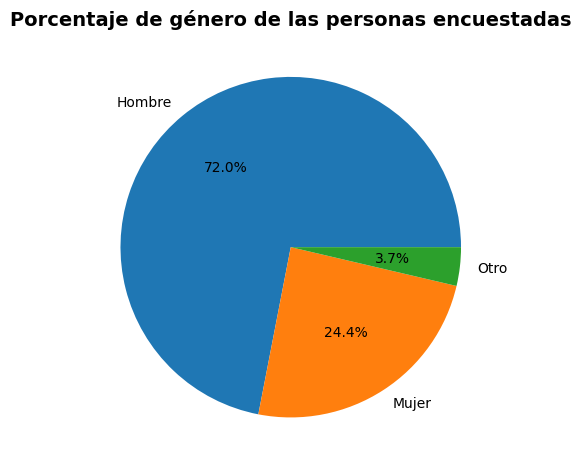

In [ ]:
# Define the columns that will be used to get the number of people that answered the survey by gender
gender_col = 'Género'

# Get the number of people that answered the survey by gender

# Función 9 = value_counts
# Devuelve el tamaño de la partición respecto al género
male = data[gender_col].value_counts()['Hombre']
female = data[gender_col].value_counts()['Mujer']
other = totalPeople - male - female

# Define the labels and data for the pie chart
labels = ['Hombre', 'Mujer', 'Otro']
pie_data = [male, female, other]

plt.title("Porcentaje de género de las personas encuestadas", fontsize=14, fontweight='bold')
plt.pie(pie_data, labels = labels, autopct='%1.1f%%')
plt.tight_layout()
#plt.savefig('results/gender_distribution.png', bbox_inches='tight')
plt.show()

### Porcentaje de las razones por las cuales las personas encuestadas ingresaron a la carrera

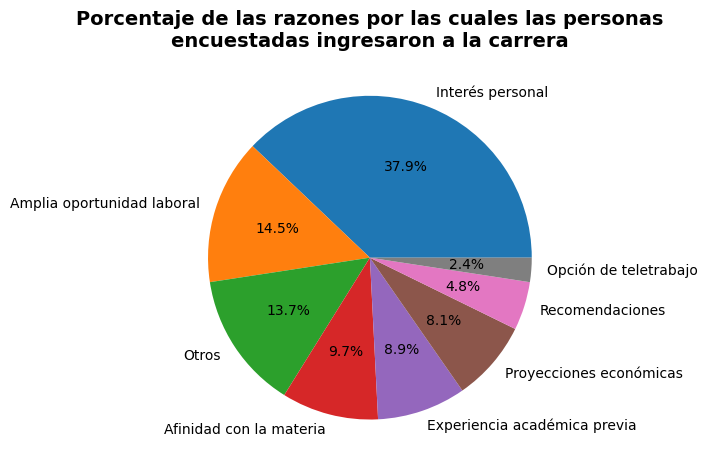

In [ ]:
career_choice_reasons_col = 'Categorías de las razones de ingreso a carrera'

# Función 10 = value_counts
# Separa un string de acuerdo a un carácter o hilera en específico de la secuencia
career_choice_reasons = data[career_choice_reasons_col].str.split('_').explode().dropna()

# Pie chart
career_choice_reasons_count = career_choice_reasons.value_counts()
labels = career_choice_reasons_count.index
pie_data = career_choice_reasons_count.values

plt.title("Porcentaje de las razones por las cuales las personas\nencuestadas ingresaron a la carrera", fontsize=14, fontweight='bold')
plt.pie(pie_data, labels = labels, autopct='%1.1f%%')
plt.tight_layout()
#plt.savefig('results/admission_factors_distribution.png', bbox_inches='tight')
plt.show()

### Porcentaje de los factores por los cuales las personas encuestadas ingresaron a la UNA

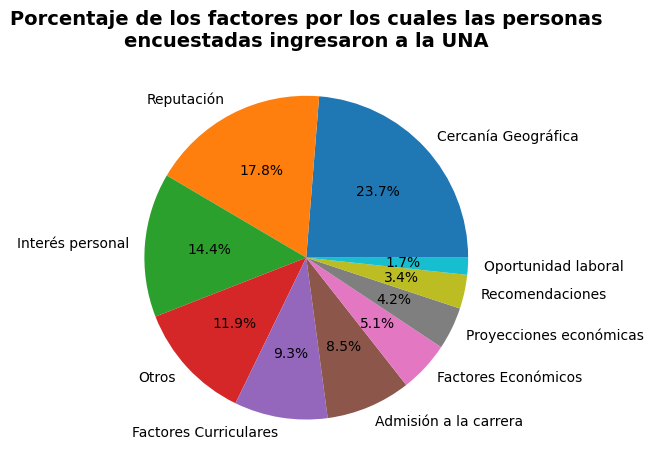

In [ ]:
admission_factor_category_col = 'Categorías de los factores de ingreso a la UNA'

admission_factors = data[admission_factor_category_col].str.split('_').explode().dropna()

# Pie chart
admission_factors_count = admission_factors.value_counts()
labels = admission_factors_count.index
pie_data = admission_factors_count.values

plt.title("Porcentaje de los factores por los cuales las personas\nencuestadas ingresaron a la UNA", fontsize=14, fontweight='bold')
plt.pie(pie_data, labels = labels, autopct='%1.1f%%')
plt.tight_layout()
#plt.savefig('results/admission_factors_distribution.png', bbox_inches='tight')
plt.show()

Tabla de Contingencia:
Nivel actual de la carrera  Cuarto  Egresado (a)  Primero  Segundo  Tercero
Nivel escolar de su madre                                                  
Bachillerato Universitario       5             0        1        1        7
Desconocido                      0             0        1        0        0
Licenciatura                     1             1        0        0        1
Licenciatura Universitaria       0             0        0        0        1
Maestría                         1             0        0        0        1
Posgrado                         0             1        0        0        0
Primaria                         4             1        0        0        6
Primaria incompleta              0             0        0        0        1
Secundaria                       7             2        4        3        6
Secundaria incompleta            6             1        1        2        7
Técnico                          1             2        1        

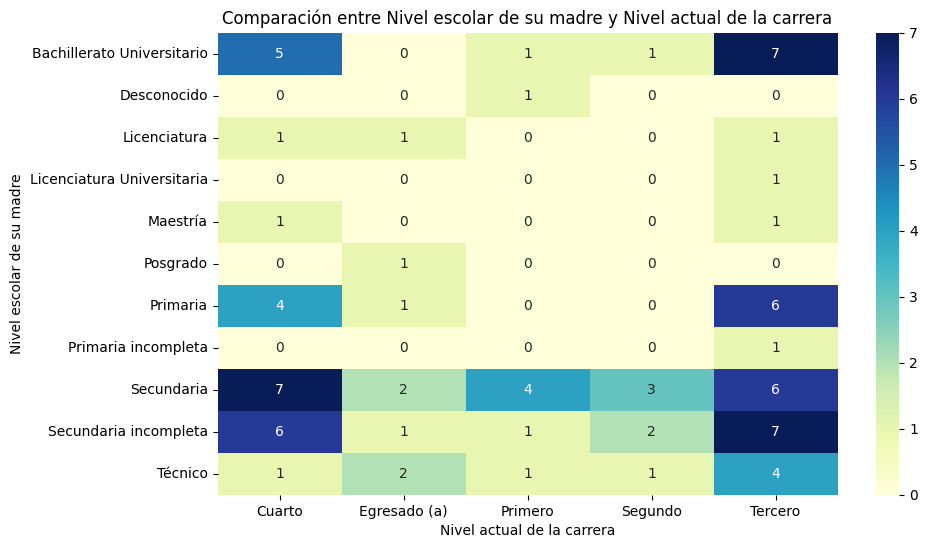

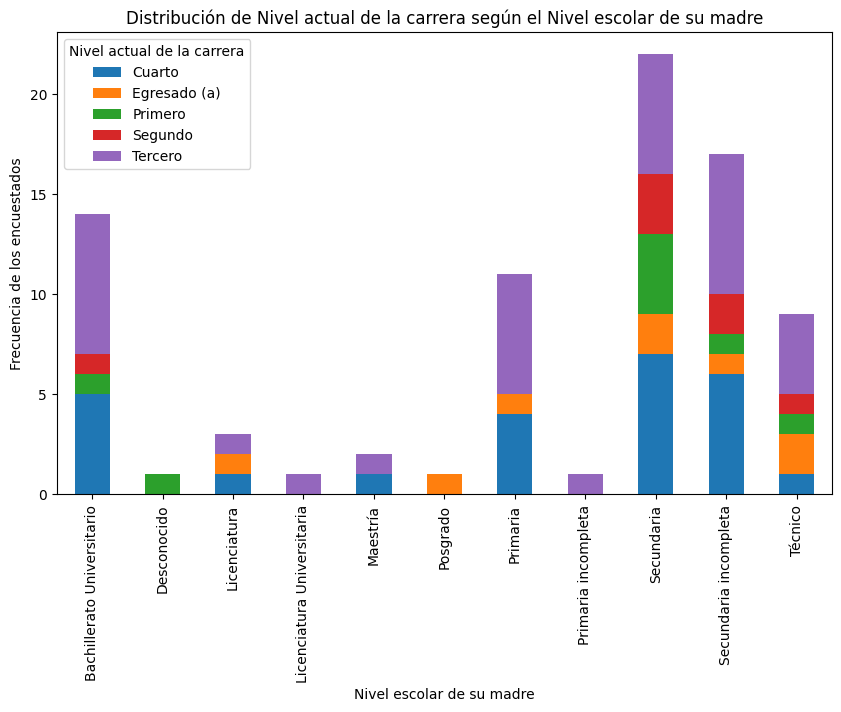

In [4]:
# Asegurarse de que las columnas están en el dataset
if 'Nivel escolar de su madre' not in df.columns or 'Nivel actual de la carrera' not in df.columns:
    raise ValueError("Las columnas 'Nivel escolar de su madre' y 'Nivel actual de la carrera' deben estar en el dataset.")

# Limpiar los datos (opcional, dependiendo del estado de tus datos)
df_clean = df[['Nivel escolar de su madre', 'Nivel actual de la carrera']].dropna()

# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_clean['Nivel escolar de su madre'], df_clean['Nivel actual de la carrera'])

print("Tabla de Contingencia:")
print(contingency_table)

# Visualizar la tabla de contingencia usando un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Comparación entre Nivel escolar de su madre y Nivel actual de la carrera')
plt.xlabel('Nivel actual de la carrera')
plt.ylabel('Nivel escolar de su madre')
plt.show()

# Visualizar la relación mediante un gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribución de Nivel actual de la carrera según el Nivel escolar de su madre')
plt.xlabel('Nivel escolar de su madre')
plt.ylabel('Frecuencia de los encuestados')
plt.legend(title='Nivel actual de la carrera')
plt.show()

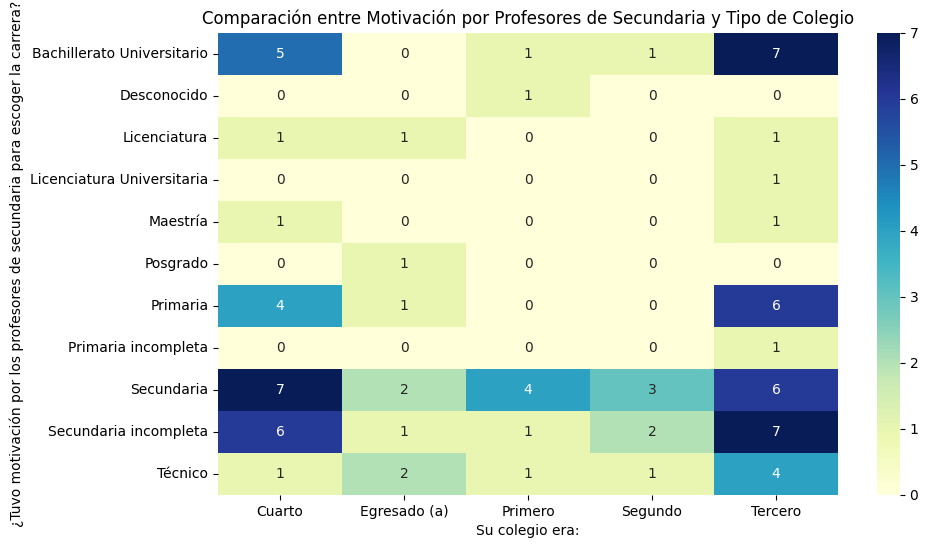

In [5]:
# Asegurarse de que las columnas están en el dataset
if '¿Tuvo motivación por los profesores de secundaria para escoger la carrera?' not in df.columns or 'Su colegio era:' not in df.columns:
    raise ValueError("Las columnas '¿Tuvo motivación por los profesores de secundaria para escoger la carrera?' y 'Su colegio era:' deben estar en el dataset.")

# Limpiar los datos (opcional, dependiendo del estado de tus datos)
df_clean = df[['¿Tuvo motivación por los profesores de secundaria para escoger la carrera?', 'Su colegio era:']].dropna()


# Visualizar la tabla de contingencia usando un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Comparación entre Motivación por Profesores de Secundaria y Tipo de Colegio')
plt.xlabel('Su colegio era:')
plt.ylabel('¿Tuvo motivación por los profesores de secundaria para escoger la carrera?')
plt.show()
